In [59]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sys
import importlib

In [60]:
PROJECT_ROOT = Path().resolve().parents[0]
sys.path.append(str(PROJECT_ROOT))
print(PROJECT_ROOT)

D:\Code_ML\energy_consumption_forecasting


In [61]:
from src.data import load_data

importlib.reload(load_data)

<module 'src.data.load_data' from 'D:\\Code_ML\\energy_consumption_forecasting\\src\\data\\load_data.py'>

In [62]:
folder_path = "D:/Code_ML/energy_consumption_forecasting/src/data/raw"
    

In [63]:
utility_data = load_data.load_raw_data(Path(folder_path))

list(utility_data.keys())

['AEP', 'DAYTON', 'DOM', 'DUQ']

In [64]:
df = utility_data["AEP"]
df.head()

,Datetime,MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0


In [65]:
''' 
    You are checking:   Datetime type
                        Missing values
                        MW scale

'''
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121273 entries, 2183 to 116161
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   MW        121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 MB


In [66]:
df["Datetime"].min(), df["Datetime"].max() # Time Range Check

(Timestamp('2004-10-01 01:00:00'), Timestamp('2018-08-03 00:00:00'))

In [67]:
df["Datetime"] = pd.to_datetime(df["Datetime"]) # datetime parsed

In [68]:
print(df["Datetime"].duplicated().sum())

4


In [69]:
df_hourly = (df.groupby("Datetime").mean().sort_index())

In [70]:
df.drop_duplicates(subset="Datetime", keep="first").set_index("Datetime").sort_index()

,MW
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0
...,...
2018-08-02 20:00:00,17673.0
2018-08-02 21:00:00,17303.0
2018-08-02 22:00:00,17001.0


In [71]:
print(df["Datetime"].duplicated().sum())

4


### Time Series Visualization

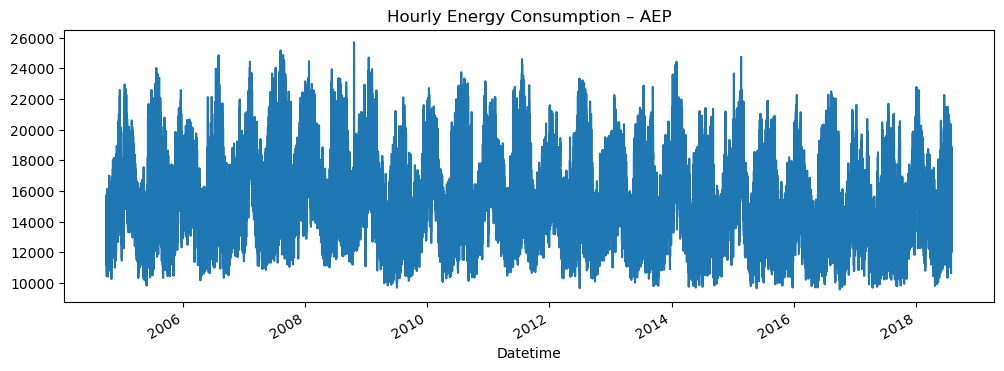

In [73]:
df.set_index("Datetime")["MW"].plot(figsize=(12,4))
plt.title("Hourly Energy Consumption – AEP")
plt.show()

In [75]:
summary = []

for utility, df in utility_data.items():
    summary.append({
        "utility": utility,
        "rows": len(df),
        "start": df["Datetime"].min(),
        "end": df["Datetime"].max(),
        "mean_MW": df["MW"].mean()
    })

pd.DataFrame(summary)

,utility,rows,start,end,mean_MW
0,AEP,121273,2004-10-01 01:00:00,2018-08-03,15499.513717
1,DAYTON,121275,2004-10-01 01:00:00,2018-08-03,2037.851140
2,DOM,116189,2005-05-01 01:00:00,2018-08-03,10949.203625
3,DUQ,119068,2005-01-01 01:00:00,2018-08-03,1658.820296


In [78]:
from src.features.build_features import build_features_for_utility

df_aep = utility_data["AEP"]

df_aep.columns

Index(['Datetime', 'MW'], dtype='object')

In [79]:

features_aep = build_features_for_utility(df_aep)


In [80]:
features_aep.head()

,Datetime,MW,hour,day_of_week,month,lag_1,lag_24,lag_168,rolling_mean_24,rolling_mean_168
2015,2004-10-08 01:00:00,12468.0,1,4,10,13271.0,12484.0,12379.0,14450.333333,13870.315476
2016,2004-10-08 02:00:00,12046.0,2,4,10,12468.0,12054.0,11935.0,14449.666667,13870.845238
2017,2004-10-08 03:00:00,11749.0,3,4,10,12046.0,11745.0,11692.0,14449.333333,13871.505952
2018,2004-10-08 04:00:00,11784.0,4,4,10,11749.0,11757.0,11597.0,14449.500000,13871.845238
2019,2004-10-08 05:00:00,11919.0,5,4,10,11784.0,12041.0,11681.0,14450.625000,13872.958333


In [81]:
features_aep.describe()

,Datetime,MW,hour,day_of_week,month,lag_1,lag_24,lag_168,rolling_mean_24,rolling_mean_168
count,121105,121105.000000,121105.00000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000,121105.000000
mean,2011-09-05 15:18:12.886338560,15501.773783,11.50159,2.999513,6.495454,15501.761083,15501.522926,15500.214252,15501.593656,15501.020272
min,2004-10-08 01:00:00,9581.000000,0.00000,0.000000,1.000000,9581.000000,9581.000000,9581.000000,11070.083333,12450.898810
25%,2008-03-22 21:00:00,13632.000000,6.00000,1.000000,3.000000,13632.000000,13632.000000,13631.000000,14049.666667,14178.375000
50%,2011-09-05 16:00:00,15312.000000,12.00000,3.000000,6.000000,15312.000000,15312.000000,15310.000000,15273.458333,15330.660714
75%,2015-02-18 11:00:00,17204.000000,18.00000,5.000000,10.000000,17204.000000,17203.000000,17202.000000,16813.208333,16634.315476
max,2018-08-03 00:00:00,25695.000000,23.00000,6.000000,12.000000,25695.000000,25695.000000,25695.000000,22881.625000,20978.690476
std,NaN,2591.801484,6.92183,1.999816,3.461397,2591.808647,2591.717226,2591.871450,1971.048624,1659.812649


In [88]:
import pandas as pd
from src.models import train_test_split # type: ignore

df = pd.read_csv("D:/Code_ML/energy_consumption_forecasting/src/data/processed/AEP_features.csv", parse_dates=["Datetime"])

X_train, X_val, y_train, y_val = train_test_split.time_based_split(
    df,
    target_col="MW",
    test_size=0.2
)

print(X_train.shape, X_val.shape)
print(y_train.index.max(), y_val.index.min())

(96884, 9) (24221, 9)
96883 96884


In [ ]:

from src.models.baseline_model import train_baseline_model, evaluate_model


model = train_baseline_model(X_train, y_train)

mae, rmse = evaluate_model(model, X_val, y_val)

print(f"MAE: {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")